### Back propagation in Neural Network
- Back propagation tells how a single training data nudge the weight and baises and how these changes can decrease the error function.

- Backpropagation is an algorithm used to efficiently train artificial neural networks. It works by calculating the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations.

- There are several variations of backpropagation, and they all work in conjunction with different optimization algorithms. The choice of optimization algorithm determines how the weights are updated during the training process. Some commonly used optimization algorithms with backpropagation are:

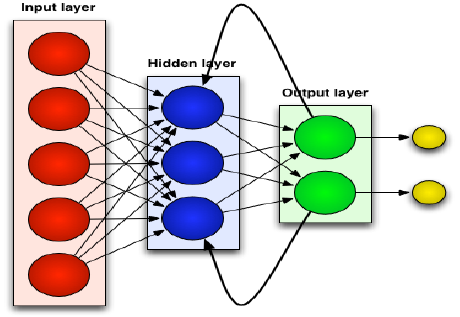

### There are several variations of backpropagation, and they all work in conjunction with different optimization algorithms. The choice of optimization algorithm determines how the weights are updated during the training process. Some commonly used optimization algorithms with backpropagation are:

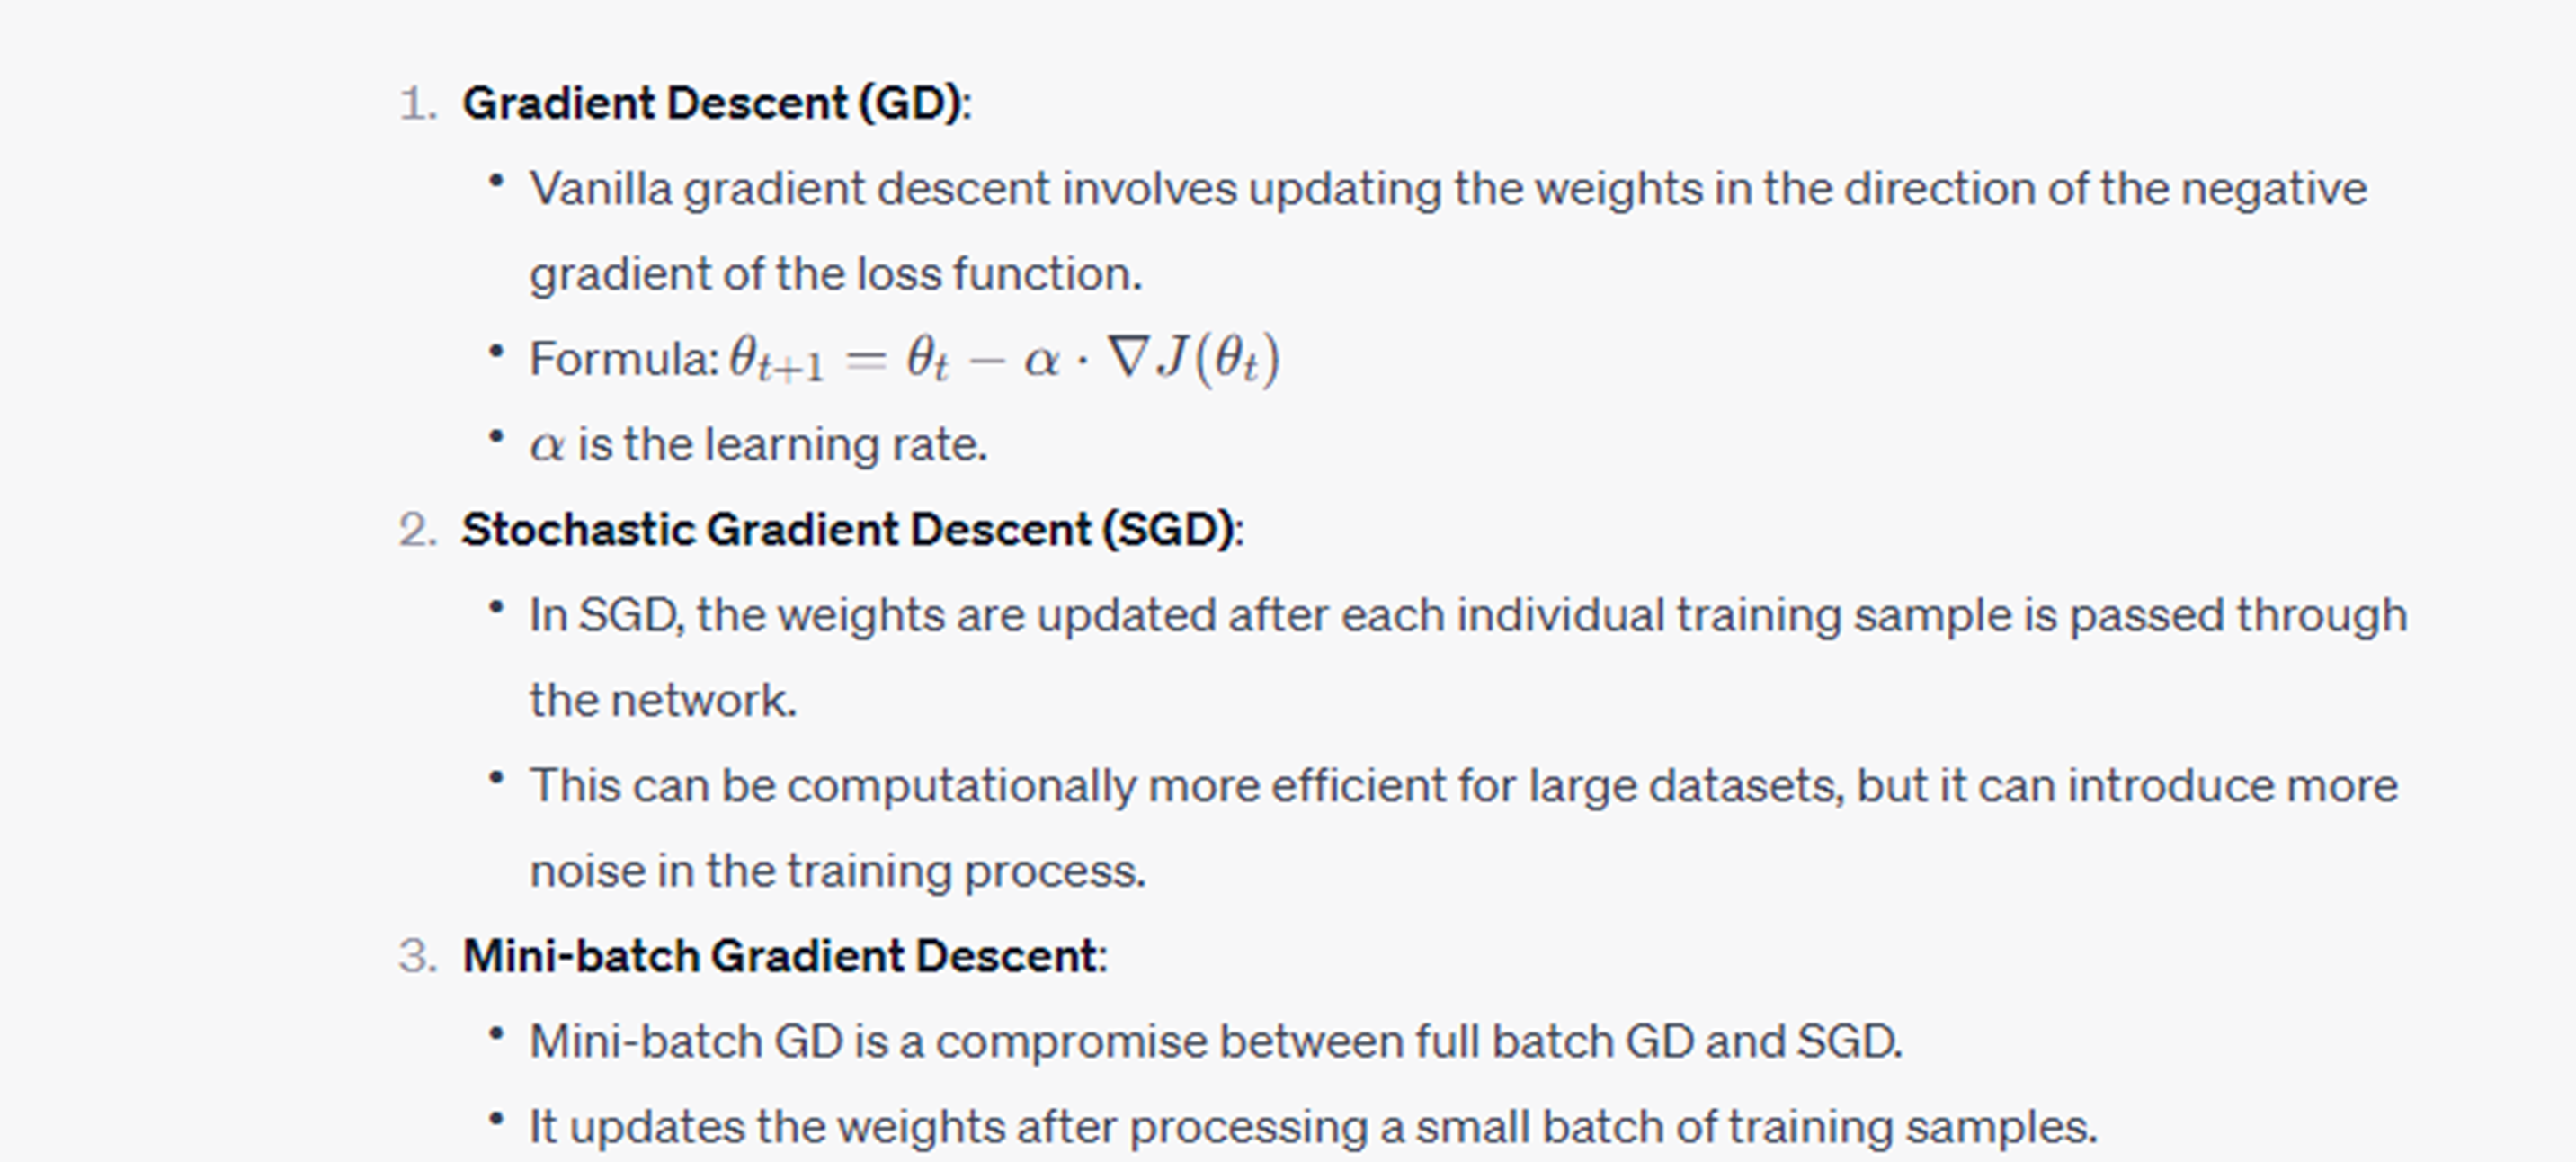

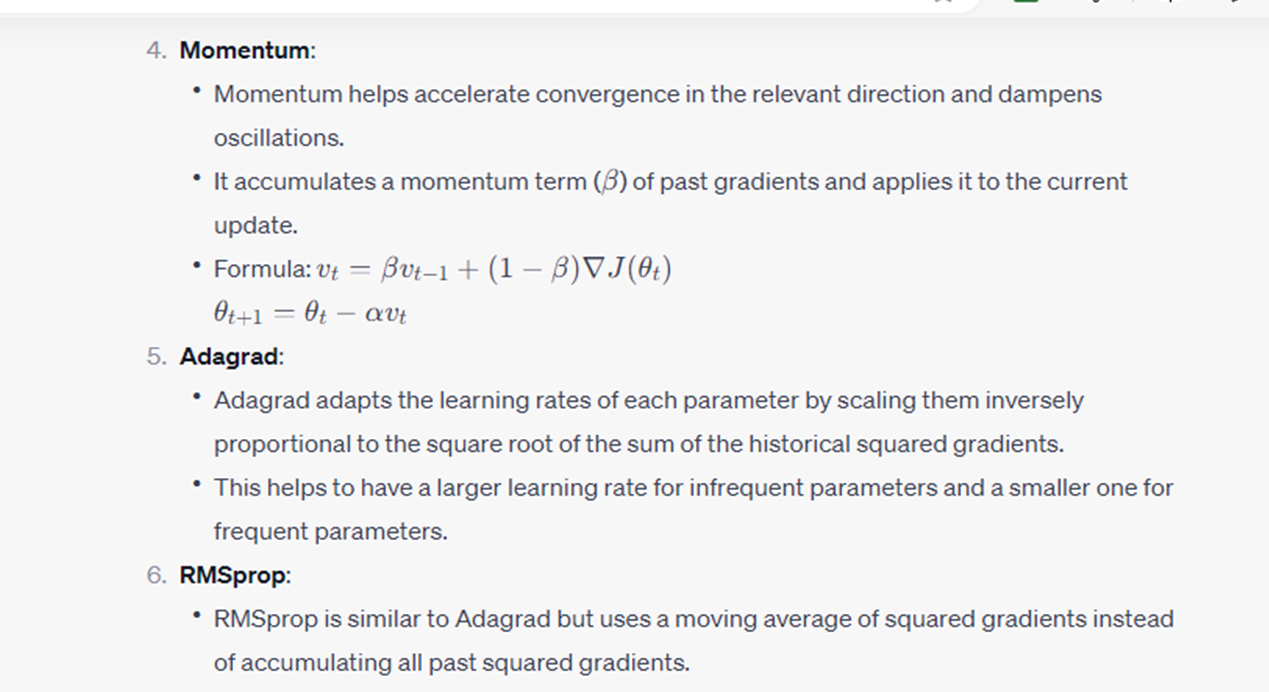


### Adam (Adaptive Moment Estimation):

- Adam combines the advantages of both Momentum and RMSprop.
- It maintains two moving averages for each parameter, one for the gradient and one for the squared gradient.
- These moving averages are used to adaptively adjust the learning rates for each parameter.


In [3]:
## Define the sigmoid activation function and its derivativ

import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.bias_output = np.random.rand(1, output_size)

    def feedforward(self, inputs):
        # Calculate activations at hidden layer
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = sigmoid(self.hidden_sum)

        # Calculate activations at output layer
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.output_sum)

        return self.final_output

    def backward(self, inputs, targets, learning_rate):
        # Calculate error at output layer
        output_error = targets - self.final_output
        d_output = output_error * sigmoid_derivative(self.final_output)

        # Calculate error at hidden layer
        hidden_error = np.dot(d_output, self.weights_hidden_output.T)
        d_hidden = hidden_error * sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_activation.T, d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += np.dot(inputs.T, d_hidden) * learning_rate
  

In [5]:
# Define training data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

# Define hyperparameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

In [6]:

# Create and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

for epoch in range(epochs):
    output = nn.feedforward(inputs)
    nn.backward(inputs, targets, learning_rate)

    if epoch % 1000 == 0:
        error = np.mean(np.square(targets - output))
        print(f"Epoch {epoch}, Error: {error}")


Epoch 0, Error: 0.3719852616876837
Epoch 1000, Error: 0.24916270059796286
Epoch 2000, Error: 0.2442176860442059
Epoch 3000, Error: 0.21516933228211632
Epoch 4000, Error: 0.1515401705569414
Epoch 5000, Error: 0.05798511722120505
Epoch 6000, Error: 0.025696514018297638
Epoch 7000, Error: 0.015391242769979493
Epoch 8000, Error: 0.010761143423500591
Epoch 9000, Error: 0.008200305106296555


In [7]:

# Test the trained neural network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = nn.feedforward(test_input)
print("\nFinal Output:")
print(test_output)



Final Output:
[[0.09851601]
 [0.91882519]
 [0.91845997]
 [0.05857325]]


- In this example, we create a simple feedforward neural network with one hidden layer. The network is trained to perform an XOR operation. The NeuralNetwork class has methods for feedforward and backward (backpropagation) passes. The weights and biases are initialized randomly. The network is trained for a fixed number of epochs, and the error is printed at regular intervals.

### Why Back propagation:
#### 1.Efficient Gradient Descent:

- Backpropagation allows for efficient computation of gradients (partial derivatives) of the loss function with respect to each parameter in the network. This is crucial for using gradient descent-based optimization algorithms to update the weights.
#### 2.Enables Learning from Data:

- Neural networks learn by adjusting the weights based on the error in their predictions. Backpropagation provides a systematic way to propagate this error backwards through the network to adjust the weights in a way that reduces the error.

#### 3. Handles Deep Networks:

- In deep neural networks (with many hidden layers), computing gradients manually becomes impractical. Backpropagation automates this process and allows for efficient training of deep architectures.

#### 4.Accommodates Complex Architectures:

- Modern neural networks can have millions or even billions of parameters. Backpropagation is scalable and can handle networks of various sizes and architectures.

#### 5. Supports Non-linear Activation Functions:

- Neural networks rely on non-linear activation functions to model complex relationships in data. Backpropagation, combined with non-linear activation functions, enables the network to learn and approximate highly non-linear functions.
#### 6. Enables Generalization:

- Backpropagation helps the network generalize from the training data to make accurate predictions on unseen data. It does this by iteratively adjusting the weights to minimize the loss function, which encourages the network to learn the underlying patterns rather than memorizing specific examples.
#### 7. Facilitates Transfer Learning:

- Pre-trained neural networks can be fine-tuned for specific tasks using backpropagation. This is a powerful technique known as transfer learning, where a network trained on one task is adapted for a related task with less data.

#### 8. Facilitates Optimization Algorithms:

- Backpropagation provides the gradients necessary for various optimization algorithms (like gradient descent, RMSprop, Adam, etc.) to update the weights in a direction that minimizes the loss function.
#### 9. Allows for Parallel Processing:

Backpropagation can be implemented efficiently on parallel computing platforms, making it suitable for training large-scale neural networks using modern hardware.

#### In summary, backpropagation is essential for training neural networks, especially in deep learning where manual computation of gradients becomes impractical. It forms the backbone of modern machine learning and enables neural networks to learn and make accurate predictions on a wide range of complex tasks.







## Simple Linear regression implementation using Backpropagation 

-  Let us take some random training data where the relationship between X_train and y_train is y = 2 * X + 1 with some added noise. The neural network has a single input neuron and a single output neuron.


In [8]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Generate some random data for training
np.random.seed(42)
X_train = np.random.rand(100, 1)
y_train = 2 * X_train + 1 + 0.1 * np.random.randn(100, 1)


## Model Compile 

- The model.compile line specifies the optimization algorithm ('sgd' for stochastic gradient descent) and the loss function ('mean_squared_error' for regression problems)

- The model.fit line is where the backpropagation takes place. It trains the model on the training data for a specified number of epochs


In [10]:
 ## Build a simple neural network
model = Sequential()
model.add(Dense(input_dim=1, units=1))  # Single input neuron, single output neuron

In [11]:

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model (backpropagation happens here)
model.fit(X_train, y_train, epochs=100, batch_size=10)





Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0231 
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7996
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4834
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8347
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5366
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1795
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.7627
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6556
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5302
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4526
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5093
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4773
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4317
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4185
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3547 


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.0706
Epoch 82/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0581
Epoch 83/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0628
Epoch 84/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.0581
Epoch 85/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.0671
Epoch 86/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0553
Epoch 87/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.0516
Epoch 88/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0495
Epoch 89/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493
Epoch 90/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0543
Epoch 91/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0466
Epoch 92/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491
Epoch 93/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0478
Epoch 94/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517
Epoch 95/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

In [14]:
# Make predictions
X_test = np.array([[0.3], [0.5], [0.7]])
predictions = model.predict(X_test)

# Print the predictions
print("Predictions:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predictions:
[[1.7321825]
 [2.0017614]
 [2.2713401]]
